### Importing the libraries

In [1]:
import pandas as pd
import numpy as np

### Lets import the Data

In [2]:
data = pd.read_csv("RS final.csv")
df = data.copy()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-04-03,11.250000,12.375000,11.250000,12.031250,8.401433,77000
1,2000-04-04,12.031250,12.031250,11.437500,11.625000,8.117750,33200
2,2000-04-05,11.562500,11.750000,11.500000,11.750000,8.205038,13600
3,2000-04-06,11.812500,12.062500,11.812500,12.062500,8.423261,28800
4,2000-04-07,11.937500,12.062500,11.906250,12.000000,8.379616,46600
...,...,...,...,...,...,...,...
6030,2024-03-22,332.010010,332.839996,328.559998,330.429993,330.429993,207400
6031,2024-03-25,332.230011,336.130005,331.489990,331.529999,331.529999,211400
6032,2024-03-26,332.329987,334.679993,329.109985,331.380005,331.380005,203100
6033,2024-03-27,333.700012,337.109985,333.299988,336.899994,336.899994,170400


### Let's understand the data

In [3]:
df.shape

(6035, 7)

checking for null values

In [4]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.dtypes 

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index('Date', inplace= True)

In [7]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
# date_col = [col for col in df.columns if df[col].dtype == "datetime64[ns]"]
# cat_cols = [col for col in df.columns if df[col].dtype == "object"]
con_cols = [col for col in df.columns if df[col].dtype == "int64" or df[col].dtype == "float64"]


In [9]:
# cat_cols

In [10]:
# date_col

In [11]:
con_cols

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

### Lets visualize the data

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


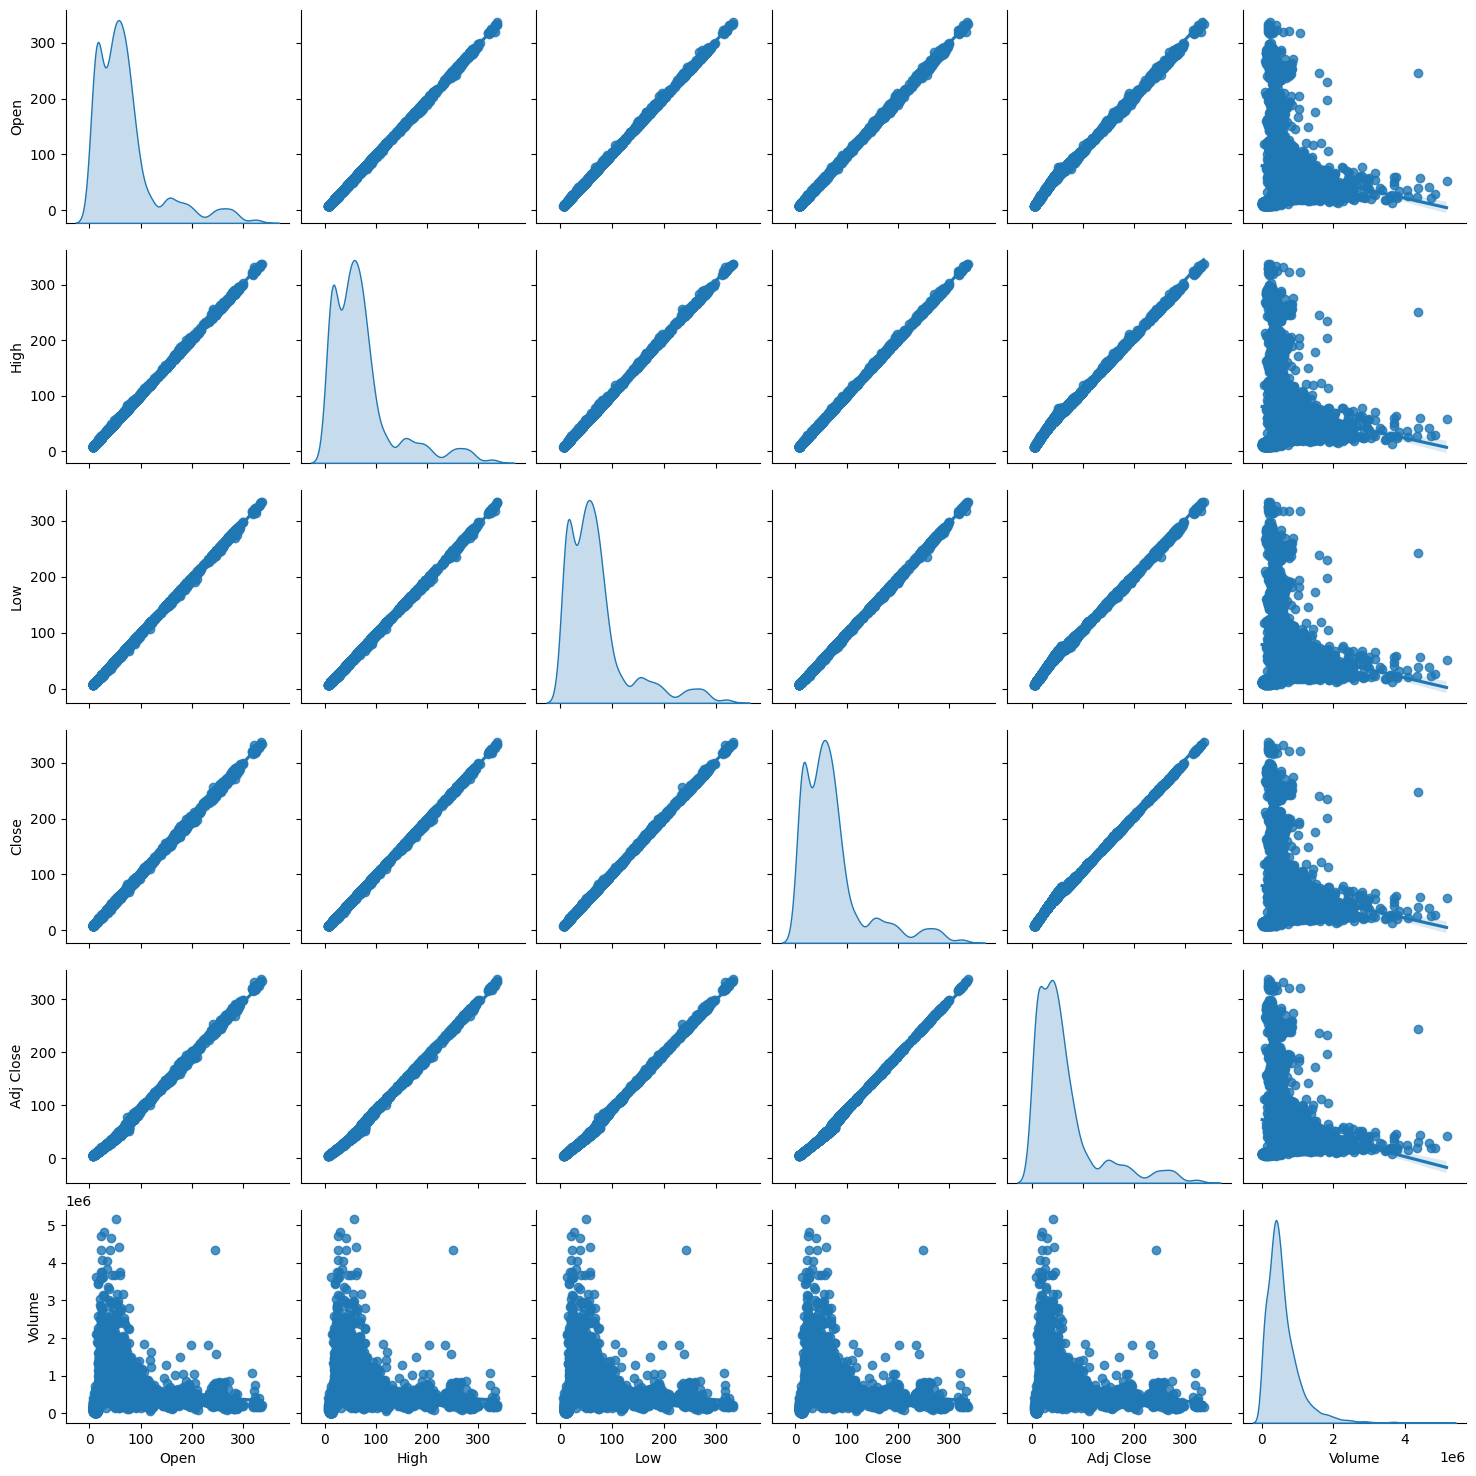

In [13]:
sns.pairplot(df[con_cols], kind= 'reg', diag_kind='kde')

In [14]:
df.columns[:-1]

Index(['Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object')

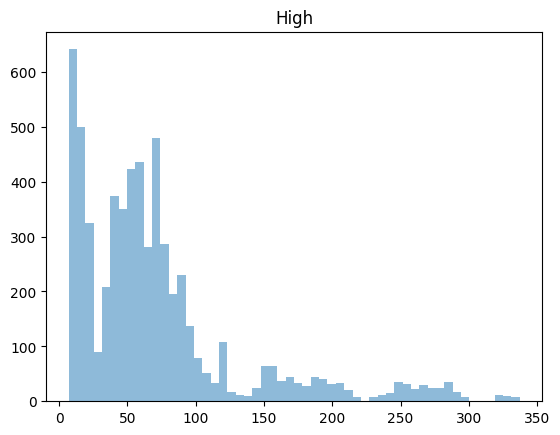

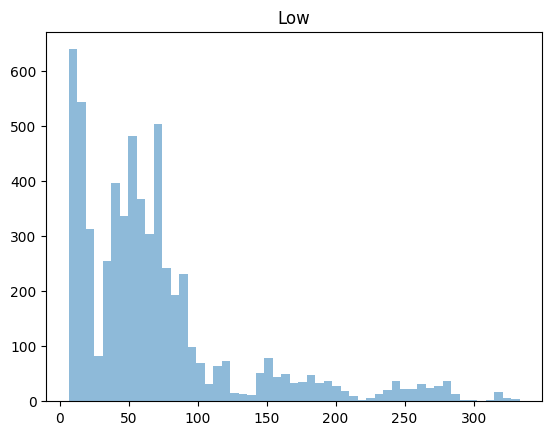

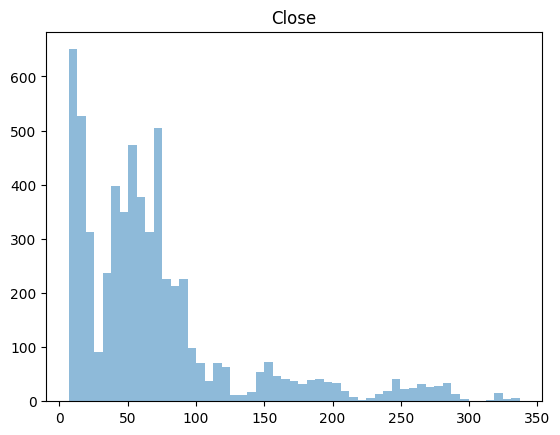

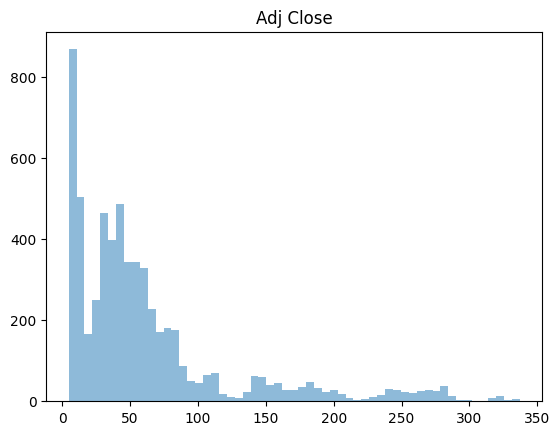

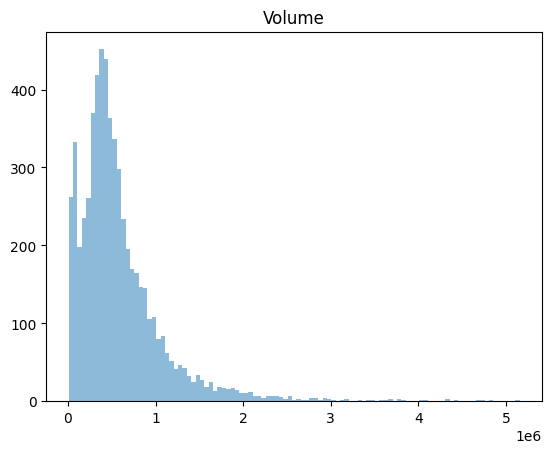

In [15]:
for i, col in enumerate(df.columns[1:]):
    plt.hist(df[col],alpha = 0.5, bins="auto")
    plt.title(col)
    plt.show()

In [16]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6035.000000,6035.000000,6035.000000,6035.000000,6035.000000,6.035000e+03
mean,71.067978,71.983056,70.136290,71.079825,62.832499,5.859031e+05
std,62.498036,63.173036,61.854589,62.545631,63.264048,5.005749e+05
min,6.740000,6.970000,6.575000,6.740000,4.847087,7.400000e+03
25%,26.567499,27.605001,25.445000,26.524999,19.866309,2.879500e+05
50%,56.380001,57.099998,55.590000,56.330002,43.784885,4.635000e+05
75%,83.360001,84.270001,82.290001,83.250000,73.784634,7.470000e+05
max,336.609985,337.109985,333.299988,336.899994,336.899994,5.155700e+06


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6035 entries, 2000-04-03 to 2024-03-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6035 non-null   float64
 1   High       6035 non-null   float64
 2   Low        6035 non-null   float64
 3   Close      6035 non-null   float64
 4   Adj Close  6035 non-null   float64
 5   Volume     6035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 330.0 KB


In [18]:
df[con_cols].corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999868,0.999861,0.999711,0.997974,-0.116788
High,0.999868,1.000000,0.999832,0.999874,0.998131,-0.113177
Low,0.999861,0.999832,1.000000,0.999861,0.998139,-0.120328
Close,0.999711,0.999874,0.999861,1.000000,0.998259,-0.116522
Adj Close,0.997974,0.998131,0.998139,0.998259,1.000000,-0.138288
Volume,-0.116788,-0.113177,-0.120328,-0.116522,-0.138288,1.000000


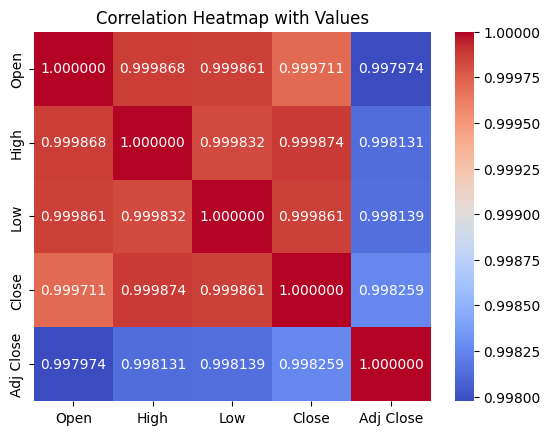

In [19]:
heatmap = sns.heatmap(df[con_cols[:-1]].corr(), annot=True, cmap='coolwarm', fmt='.6f')
plt.title('Correlation Heatmap with Values')
plt.show()

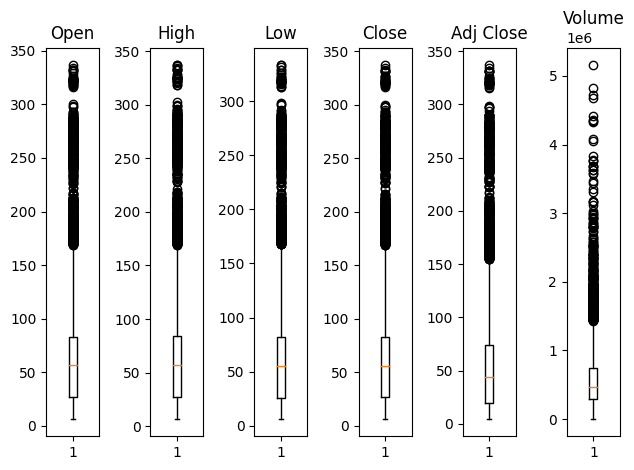

In [20]:
for i, col in enumerate(df[con_cols].columns):
    plt.subplot(1, len(df[con_cols].columns), i+1)
    plt.boxplot(df[col])
    plt.title(col)
    # plt.show()
plt.tight_layout()
plt.show()

In [21]:
import mplfinance as mpf

/home/its_relative/.local/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


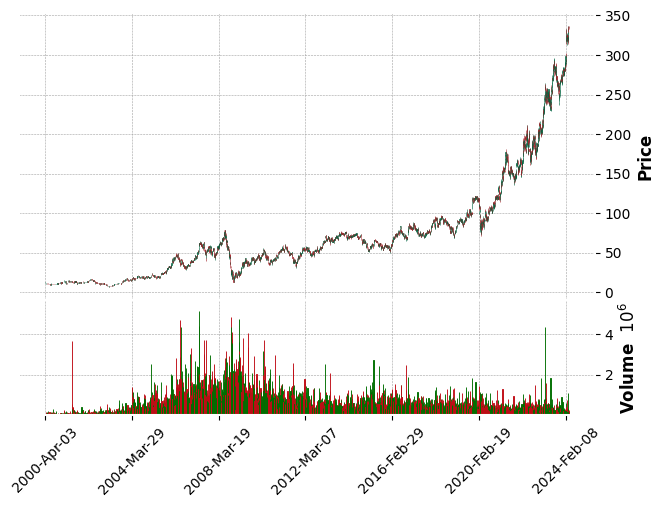

In [22]:
mpf.plot(df, type='candle', ylabel='Price', volume=True, style='charles')


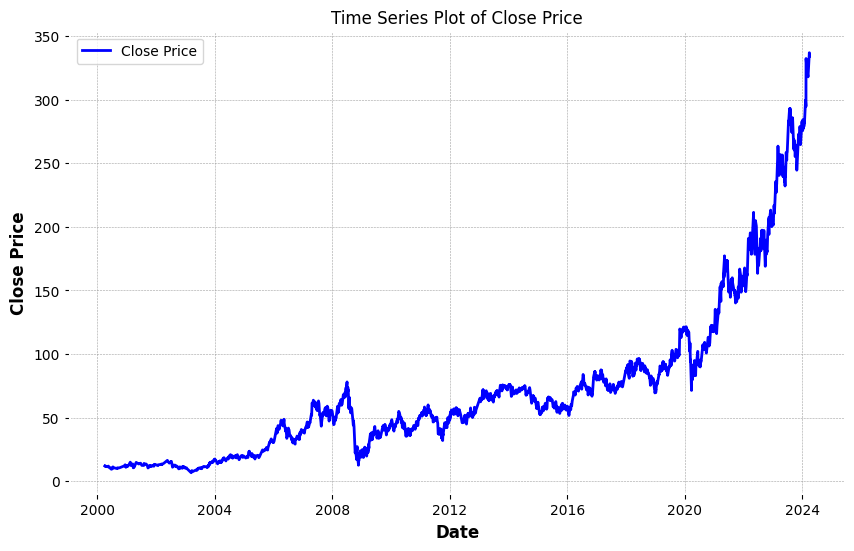

In [23]:
# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Time Series Plot of Close Price')
plt.legend()
plt.grid(True)
plt.show()

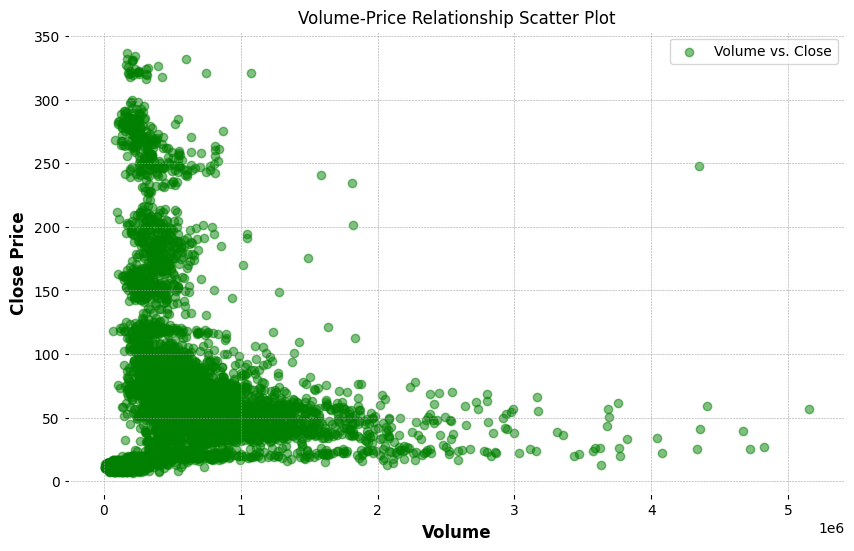

In [24]:

# Plotting the volume-price relationship scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Close'], label='Volume vs. Close', color='green', alpha=0.5)
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Volume-Price Relationship Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()


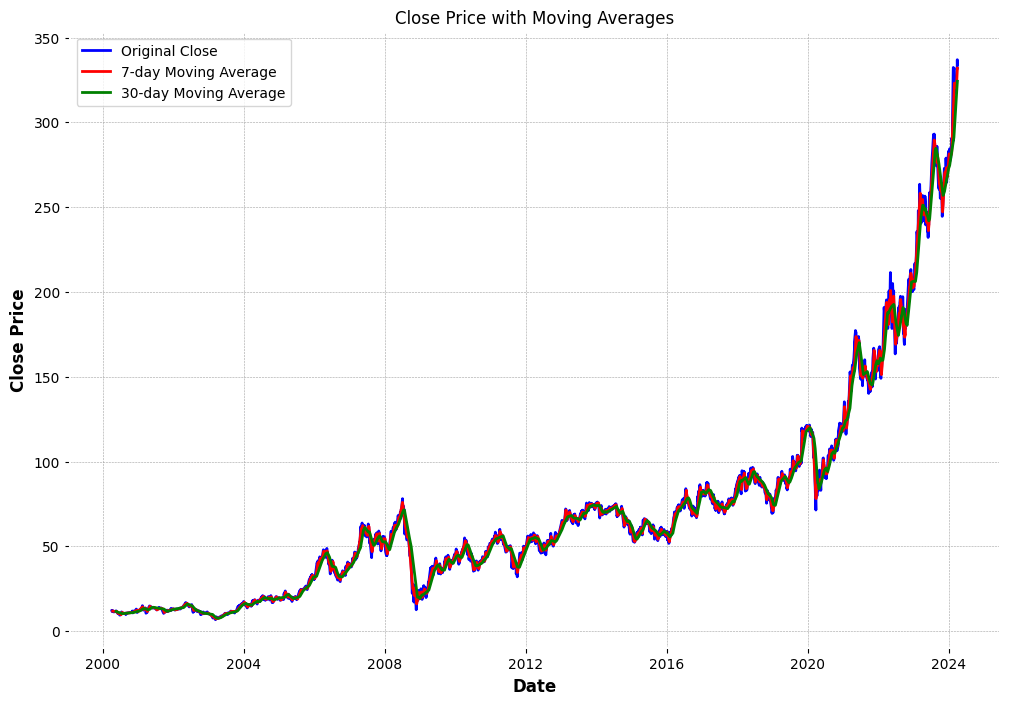

In [25]:
# Calculate moving averages (e.g., 7-day, 30-day)
df['Close_7day_MA'] = df['Close'].rolling(window=7).mean()
df['Close_30day_MA'] = df['Close'].rolling(window=30).mean()

# Plotting the original data and moving averages
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Close'], label='Original Close', color='blue')
plt.plot(df.index, df['Close_7day_MA'], label='7-day Moving Average', color='red')
plt.plot(df.index, df['Close_30day_MA'], label='30-day Moving Average', color='green')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()



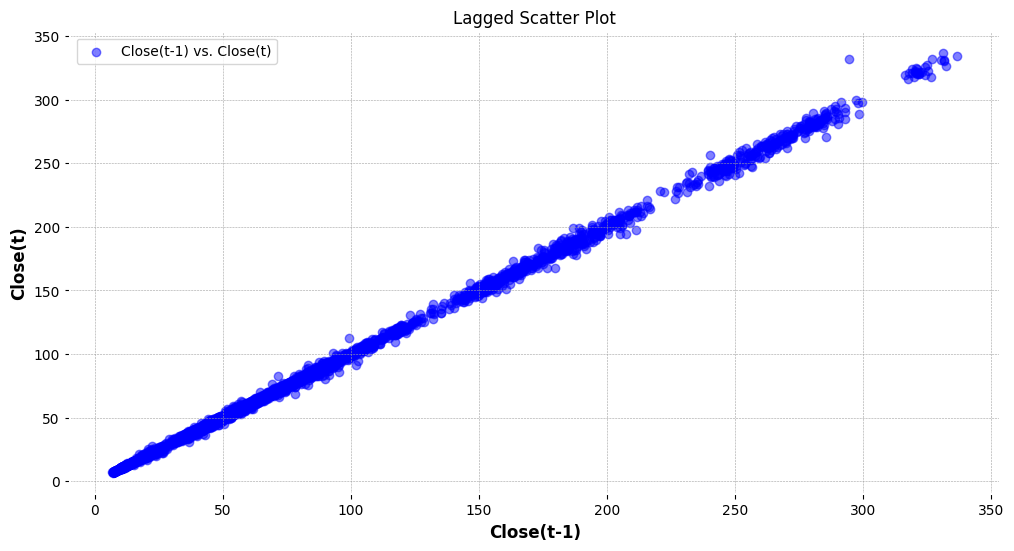

In [26]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# # Autocorrelation Plot (ACF)
# plt.figure(figsize=(12, 6))
# plot_acf(df['Close'], lags=30, alpha=0.05) 
# plt.xlabel('Lag')
# plt.ylabel('Autocorrelation')
# plt.title('Autocorrelation Function (ACF)')
# plt.grid(True)
# plt.show()

# # Partial Autocorrelation Plot (PACF)
# plt.figure(figsize=(12, 6))
# plot_pacf(df['Close'], lags=30, alpha=0.05) 
# plt.xlabel('Lag')
# plt.ylabel('Partial Autocorrelation')
# plt.title('Partial Autocorrelation Function (PACF)')
# plt.grid(True)
# plt.show()

# Lagged Scatter Plots
plt.figure(figsize=(12, 6))
plt.scatter(df['Close'].shift(1), df['Close'], label='Close(t-1) vs. Close(t)', color='blue', alpha=0.5)
plt.xlabel('Close(t-1)')
plt.ylabel('Close(t)')
plt.title('Lagged Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()



# Building Models

Predicting the closing stock price of Reliance

In [27]:
import yfinance as yf
from datetime import datetime
ticker = "RS"
start = "2000-03-01"
end = datetime.now()
df = yf.download(tickers=ticker, start= start, end= end)


[*********************100%%**********************]  1 of 1 completed


In [28]:
# here we are printing shape of data
df.shape

(6068, 6)

In [29]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-03-01,9.687500,10.312500,9.687500,10.125000,7.049351,60200
2000-03-02,10.062500,10.156250,9.875000,9.875000,6.875292,16600
2000-03-03,9.750000,10.093750,9.625000,10.093750,7.027595,19400
2000-03-06,10.031250,10.062500,8.812500,9.000000,6.266093,121800
2000-03-07,9.125000,9.375000,9.125000,9.281250,6.461905,70800
...,...,...,...,...,...,...
2024-04-08,342.079987,342.200012,334.970001,337.079987,337.079987,234800
2024-04-09,339.290009,341.890015,333.250000,335.950012,335.950012,193900
2024-04-10,331.329987,334.769989,330.209991,332.010010,332.010010,189800


Create a new data frame with only the closing price and convert it to an array.
Then create a variable to store the length of the training data set. I want the training data set to contain about 80% of the data.

In [30]:
import math

In [31]:
#Creating a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

4855

Now scale the data set to be values between 0 and 1 inclusive.

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
# Lets Scale all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01015602],
       [0.00940594],
       [0.01006226],
       ...,
       [0.9759076 ],
       [0.97212719],
       [0.95646562]])

In [55]:
#Creating the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]
#Spliting the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train, "Train")
        print(y_train,"Test")
        print()

[array([0.01015602, 0.00940594, 0.01006226, 0.00678068, 0.00762451,
       0.00874963, 0.00893714, 0.00856211, 0.00921842, 0.0090309 ,
       0.00865587, 0.01240624, 0.01128113, 0.0120312 , 0.01165617,
       0.01081233, 0.01062481, 0.01287504, 0.01362511, 0.01334383,
       0.01371887, 0.01446895, 0.01334383, 0.01587534, 0.01465647,
       0.0150315 , 0.0159691 , 0.01578158, 0.01512526, 0.01484398,
       0.01531278, 0.01493774, 0.01540654, 0.01465647, 0.01531278,
       0.01456271, 0.01381263, 0.01325008, 0.01475023, 0.01390639,
       0.01400015, 0.01428143, 0.01428143, 0.01400015, 0.01418767,
       0.01409391, 0.01418767, 0.01325008, 0.01353135, 0.01278128,
       0.01428143, 0.01484398, 0.01578158, 0.01578158, 0.01559406,
       0.01484398, 0.01446895, 0.01334383, 0.0125    , 0.01221872])] Train
[0.011937444116846819] Test

[array([0.01015602, 0.00940594, 0.01006226, 0.00678068, 0.00762451,
       0.00874963, 0.00893714, 0.00856211, 0.00921842, 0.0090309 ,
       0.00865587, 0.01

In [53]:
x_train.shape

(4795, 60, 1)

In [54]:
y_train.shape

(4795,)

In [37]:
#Lets Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [38]:
# Lets reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [39]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

2024-04-15 15:22:29.477189: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-15 15:22:29.479235: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-15 15:22:29.504365: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 15:22:29.504398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 15:22:29.505197: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [40]:
#Lets Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [41]:
# Lets Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
# Lets train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

4795/4795 [==============================] - 58s 12ms/step - loss: 1.0150e-04


In [43]:
# Lets create testing data set
test_data = scaled_data[training_data_len - 60: , : ]
#Creating the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] 
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [44]:
# Lets convert x_test to a numpy array  
x_test = np.array(x_test)

In [45]:
# Lets reshape the data into the shape accepted by the LSTM  
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [46]:
# now we are getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

38/38 [==============================] - 1s 7ms/step


In [47]:
# Lets calculate the value of RMSE 
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

5.263282509410025

/tmp/ipykernel_29258/781880431.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


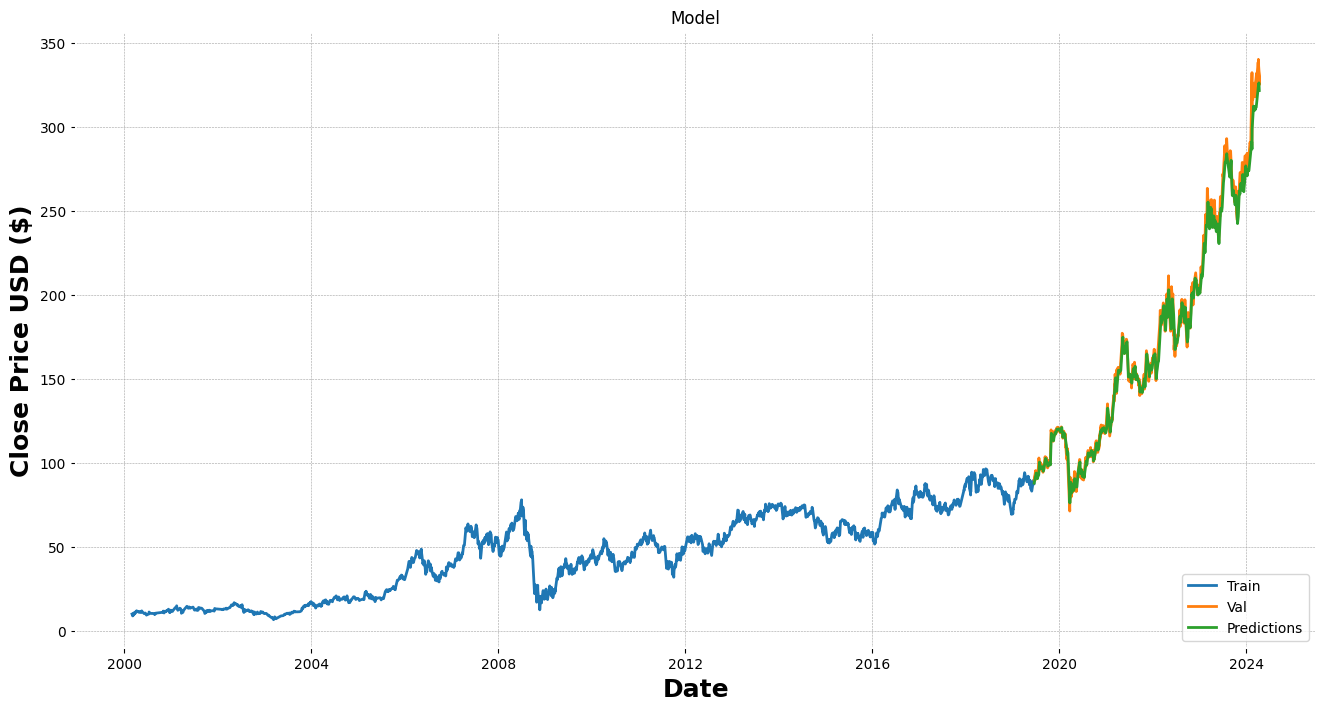

In [48]:
#Lets Plot the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [49]:
print(valid)

                 Close  Predictions
Date                               
2019-06-19   89.980003    88.046410
2019-06-20   90.510002    88.334229
2019-06-21   90.290001    88.819183
2019-06-24   89.790001    89.191292
2019-06-25   89.709999    89.290611
...                ...          ...
2024-04-08  337.079987   325.958374
2024-04-09  335.950012   326.269165
2024-04-10  332.010010   325.766846
2024-04-11  330.750000   323.833527
2024-04-12  325.529999   321.712067

[1213 rows x 2 columns]


### Evaluation

Lets calculate the r2 score of our model for evaluation

In [50]:
from sklearn.metrics import r2_score

r2 = r2_score(valid["Close"], valid["Predictions"])

In [51]:
r2

0.9937106223816641